In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

# 以 0.001 的步长遍历 0 至 0.2
p_real = np.arange(0.001, 0.301, 0.001)

# 读取 Excel 数据
df = pd.read_excel('./data/Q4/Q4.xlsx')   # 来自matlab源程序

df['p_real'] = p_real

print(df.head())

   p_sampling  p_real
0    0.000944   0.001
1    0.001702   0.002
2    0.002432   0.003
3    0.003457   0.004
4    0.003974   0.005


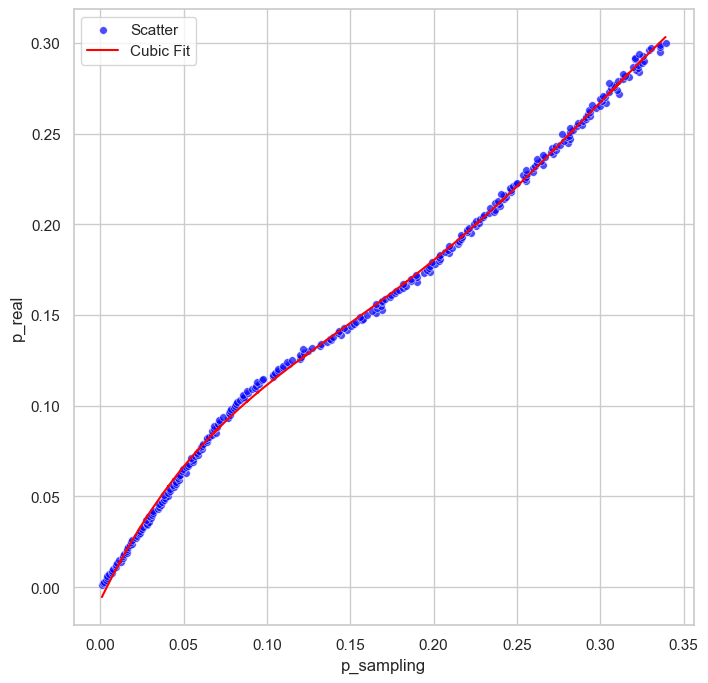

In [ ]:
# 三次函数拟合
coefficients = np.polyfit(df['p_sampling'], df['p_real'], 4)
polynomial = np.poly1d(coefficients)

# 生成拟合的 y 值
p_fitted = polynomial(df['p_sampling'])

# 设置 Seaborn 主题风格
sns.set_theme(style="whitegrid")

# 创建图形，大小为 8x10 英寸
plt.figure(figsize=(8, 8))

# 绘制散点图
sns.scatterplot(
    x=df['p_sampling'], 
    y=df['p_real'], 
    s=30, 
    alpha=0.7, 
    color='blue', 
    label='Scatter'
)

# 绘制三次拟合曲线
plt.plot(df['p_sampling'], p_fitted, color='red', label='Cubic Fit')

# 添加标题和标签
plt.xlabel('p_sampling')
plt.ylabel('p_real')

# 显示图例
plt.legend()
plt.savefig('./fig/Q4/Q4-scatter.svg')
# 显示图像
plt.show()

In [10]:
print(coefficients)

# p_{\text{real}} = 32.8519663 \cdot p_{\text{sampling}}^3 - 14.1217705 \cdot p_{\text{sampling}}^2 + 2.55134536 \cdot p_{\text{sampling}} - 0.0322944141

[-4.06093165e+01  3.57694549e+01 -1.03914831e+01  1.91000279e+00
 -7.30852185e-03]


In [ ]:
import pickle
import numpy as np
# 保存模型到文件
with open('./model/cubic_model.pkl', 'wb') as f:
    pickle.dump(polynomial, f)

print("模型已保存！")

模型已保存！
